# <h1 style="font-family: Trebuchet MS; padding: 8 px; font-size: 38px; color: #4A1B8C; text-align: center; line-height: 1.2;"><b>Airline passenger satisfaction </b>
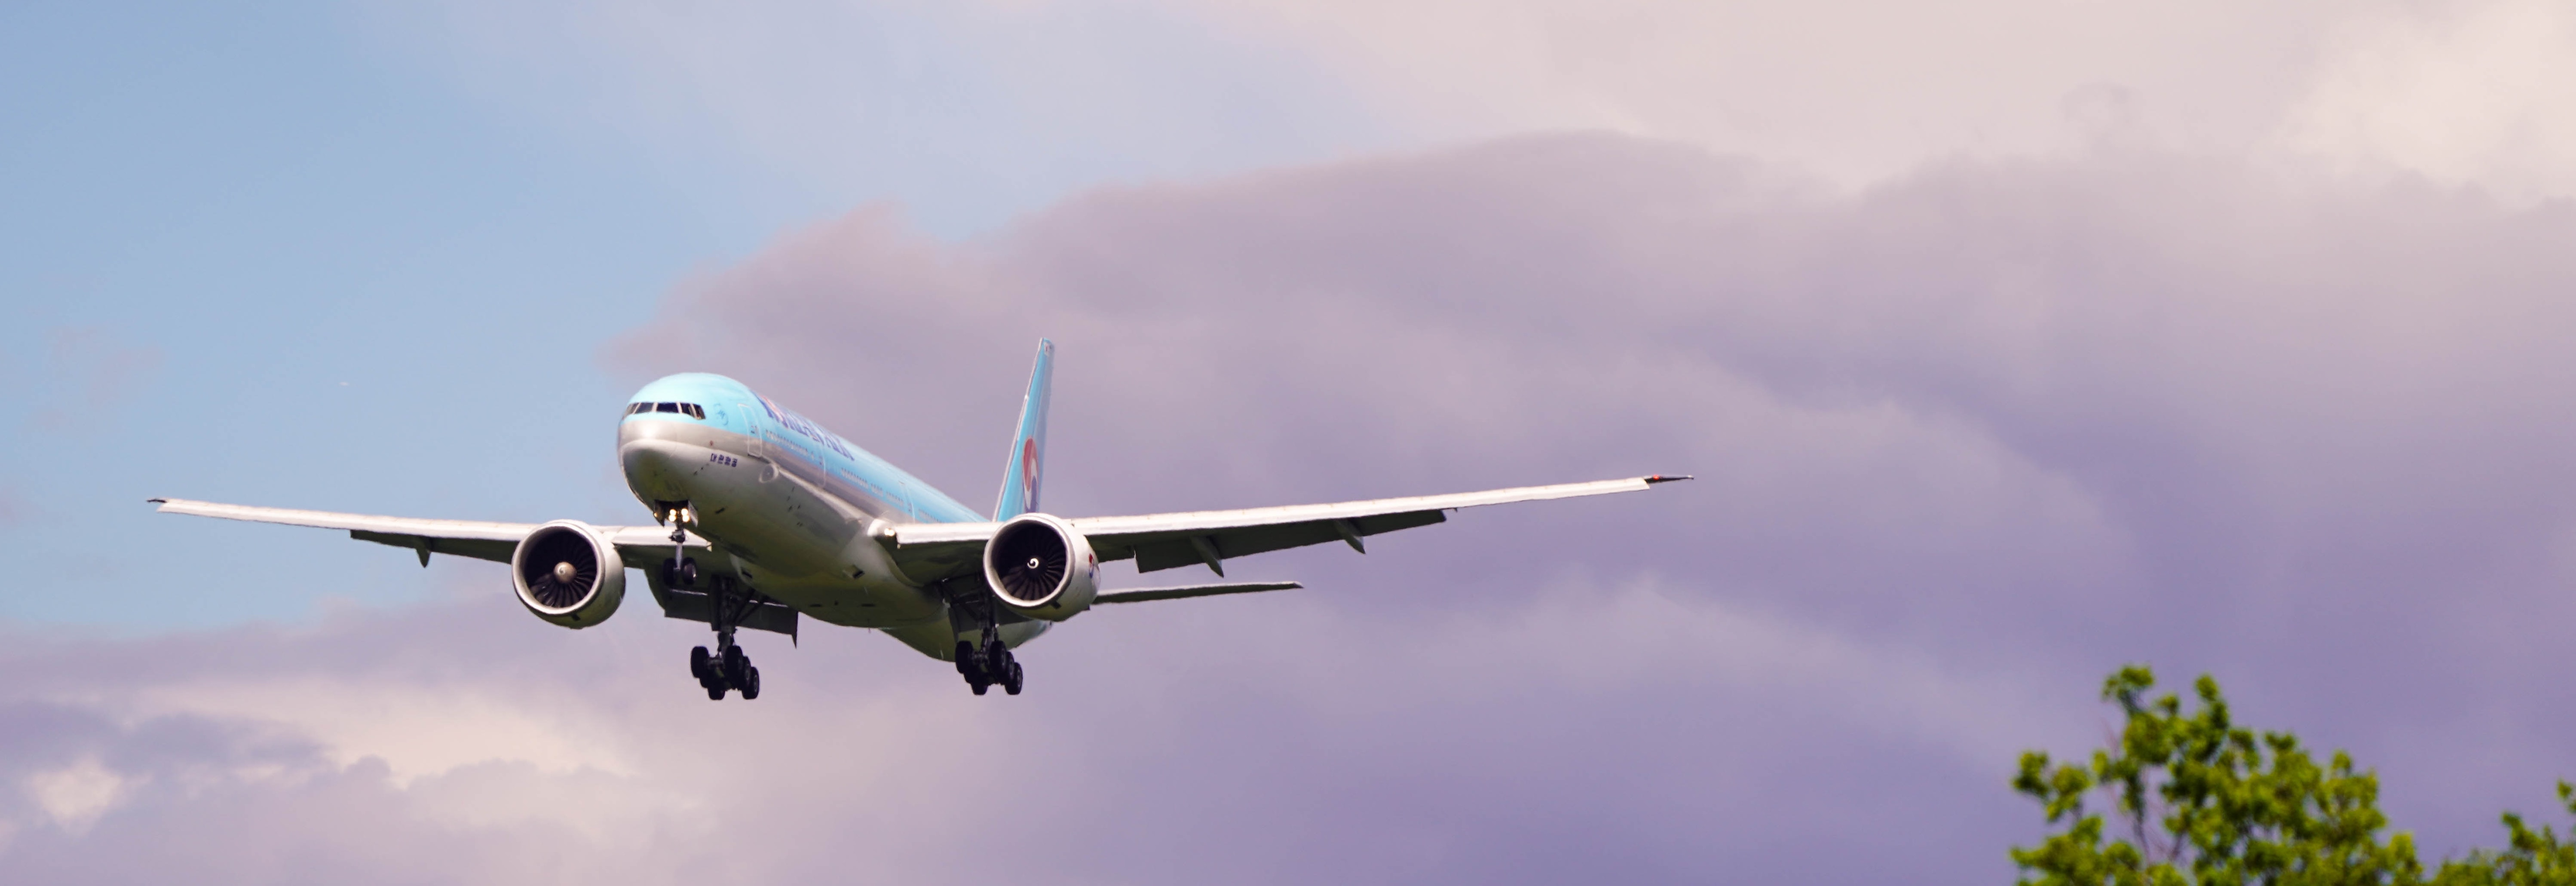

## <div style="font-family: Trebuchet MS; background-color: #4A1B8C; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction</div>

**<span style="color:#5E308C;font-size:120%">Aim</span>**<br>

This data set contains a survey on air passenger satisfaction. The problem statement is to build a machine learning model to predict level of client satisfaction and to identify the key factors which lead to the satisfaction of the customer.

**<span style="color:#5E308C;font-size:120%">There is the following information about the passengers of some airline:</span>**


**Gender:** male or female<br>
**Customer type:** regular or non-regular airline customer<br>
**Age:** the actual age of the passenger<br>
**Type of travel:** the purpose of the passenger's flight (personal or business travel)<br>
**Class:** business, economy, economy plus<br>
**Flight distance**<br>
**Inflight wifi service:** satisfaction level with Wi-Fi service on board (1-5)<br>
**Departure/Arrival time convenient:** departure/arrival time satisfaction level (1-5)<br>
**Ease of Online booking:** online booking satisfaction rate (1-5)<br>
**Gate location:** level of satisfaction with the gate location (1-5)<br>
**Food and drink:** food and drink satisfaction level (1-5)<br>
**Online boarding:** satisfaction level with online boarding (1-5)<br>
**Seat comfort:** seat satisfaction level (1-5)<br>
**Inflight entertainment:** satisfaction with inflight entertainment (1-5)<br>
**On-board service:** level of satisfaction with on-board service (1-5)<br>
**Leg room service:** level of satisfaction with leg room service (1-5)<br>
**Baggage handling:** level of satisfaction with baggage handling (1-5)<br>
**Checkin service:** level of satisfaction with checkin service (1-5)<br>
**Inflight service:** level of satisfaction with inflight service (1-5)<br>
**Cleanliness:** level of satisfaction with cleanliness (1-5)<br>
**Departure delay in minutes**<br>
**Arrival delay in minutes**<br>



## <div style="font-family: Trebuchet MS; background-color: #4A1B8C; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Libraries and data </div>

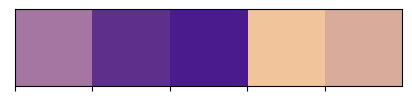

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from collections import Counter
from skimpy import clean_columns

#-----------------------------
from sklearn.model_selection import KFold, cross_validate, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

#-----------------------------
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from phik.report import plot_correlation_matrix

import optuna

import warnings
warnings.filterwarnings("ignore")

class clr:
    S = '\033[1m' + '\033[91m'
    E = '\033[0m'

my_colors = ['#A676A3', '#5E308C', '#4A1B8C', '#F2C49B', '#D9AB9A']
CMAP1 = ListedColormap(my_colors)

sns.palplot(sns.color_palette(my_colors))

<div style="font-family: Trebuchet MS; background-color: #A676A3; color: #FFFFFF; padding: 12px;">Reading Dataset</div>

In [2]:
data = pd.read_csv('/Users/user/Downloads/clients.csv', index_col=0)

In [3]:
# --- Print Dataset Info ---
print(clr.S+'.: Dataset Info :.'+clr.E)
print('*' * 30)
print('Total Rows:'+clr.S, data.shape[0])
print(clr.E+'Total Columns:'+clr.S, data.shape[1])
print(clr.E+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print(clr.S+'.: Dataset Details :.'+clr.E)
print('*' * 30)
data.info(memory_usage = False)


.: Dataset Info :.
******************************
Total Rows: 129880
Total Columns: 23
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129549 non-null  object 
 1   Age                                129564 non-null  float64
 2   Customer Type                      129803 non-null  object 
 3   Type of Travel                     129779 non-null  object 
 4   Class                              129764 non-null  object 
 5   Flight Distance                    129786 non-null  float64
 6   Departure Delay in Minutes         129773 non-null  float64
 7   Arrival Delay in Minutes           129371 non-null  float64
 8   Inflight wifi service              129835 non-null  float64
 9   D

<div style="font-family: Segoe UI; line-height: 2; color: #000000;padding: 12px; text-align: justify; border: 4px solid #4A1B8C">
    - It can be seen that dataset has successfully imported.<br>
    - In the dataset, there are <mark><b>22 columns</b></mark> with <mark><b>129880 observations</b></mark>. Also, there are <mark><b>null values</b></mark> in each column except `satisfaction`. The <b>details of each variables</b> also can be seen above.<br>
</div>

In [4]:
# Standardize column names
data = clean_columns(data)
data.columns

Index(['gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'satisfaction'],
      dtype='object')

## <div style="font-family: Trebuchet MS; background-color: #4A1B8C; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | EDA </div>

In [5]:
numeric = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
categorical = ['gender', 'customer_type', 'type_of_travel', 'class', 'inflight_wifi_service',
               'departure_arrival_time_convenient', 'ease_of_online_booking',
               'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
               'inflight_entertainment', 'on_board_service', 'leg_room_service',
               'baggage_handling', 'checkin_service', 'inflight_service',
               'cleanliness', 'satisfaction']

### <div style="font-family: Trebuchet MS; background-color: #5E308C; color: #FFFFFF; padding: 10px; line-height: 1.2;">3.1 | Categorical features </div>

In [6]:
data[categorical].nunique()

gender                                2
customer_type                         2
type_of_travel                        2
class                                 3
inflight_wifi_service                22
departure_arrival_time_convenient    23
ease_of_online_booking               23
gate_location                        23
food_and_drink                       24
online_boarding                      21
seat_comfort                         21
inflight_entertainment               21
on_board_service                     20
leg_room_service                     25
baggage_handling                     22
checkin_service                      22
inflight_service                     26
cleanliness                          21
satisfaction                          3
dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000;padding: 12px; text-align: justify; border: 4px solid #4A1B8C">
    - Сustomer rating columns contain many more values than 1 to 5<br>
    - Separately it is worth considering the columns with information about customers and the target value, which should have only 2 values<br>
</div>

In [7]:
def vizual_cat(category):
    '''
    Function for visualisation categorical feature
    '''
    f,ax=plt.subplots(1,2,figsize=(10,4))
    plt.suptitle(f'{category} type distribution', fontweight='heavy', fontsize=20, 
                 fontfamily='sans-serif', color=my_colors[2])
    data[category].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors=my_colors)
    ax[0].set_title('Pie chart', size=14, weight='bold')
    ax[0].set_ylabel('')
    sns.countplot(x=data[category], ax=ax[1], palette=my_colors)
    ax[1].set_title('Histogram', size=14, weight='bold')
    f.tight_layout()

    print('*' * 30)
    print(clr.S+f'.: {category} Type Total :.'+clr.E)
    print('*' * 30)
    print(data[category].value_counts(dropna=False))
    

******************************
.: gender Type Total :.
******************************
gender
Female    65726
Male      63823
NaN         331
Name: count, dtype: int64
******************************
.: customer_type Type Total :.
******************************
customer_type
Loyal Customer       106040
disloyal Customer     23763
NaN                      77
Name: count, dtype: int64
******************************
.: type_of_travel Type Total :.
******************************
type_of_travel
Business travel    89625
Personal Travel    40154
NaN                  101
Name: count, dtype: int64
******************************
.: class Type Total :.
******************************
class
Business    62103
Eco         58264
Eco Plus     9397
NaN           116
Name: count, dtype: int64
******************************
.: satisfaction Type Total :.
******************************
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: count, 

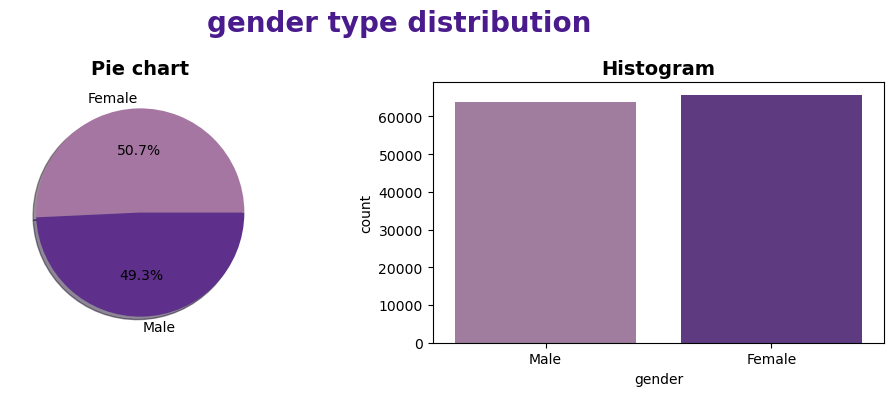

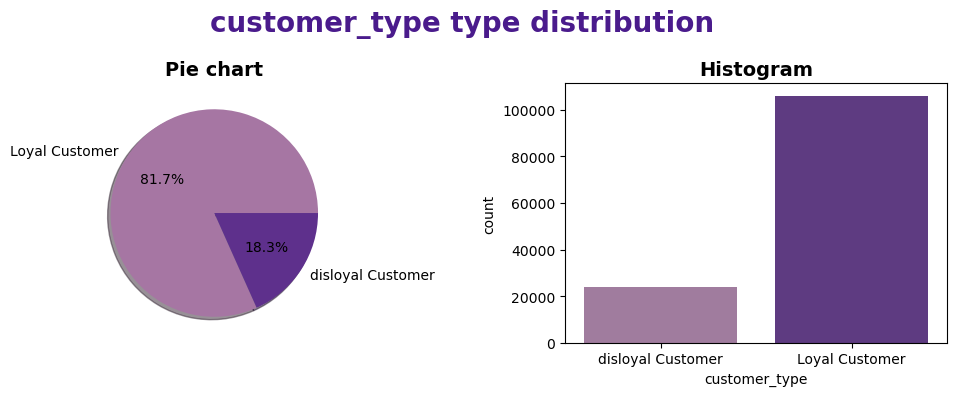

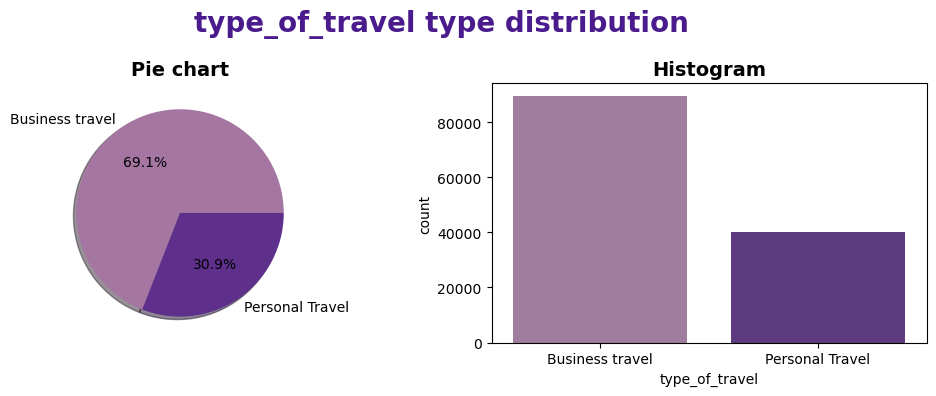

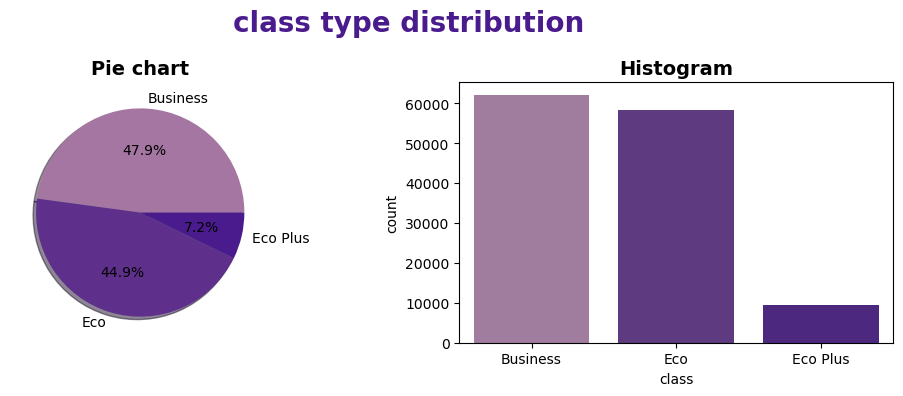

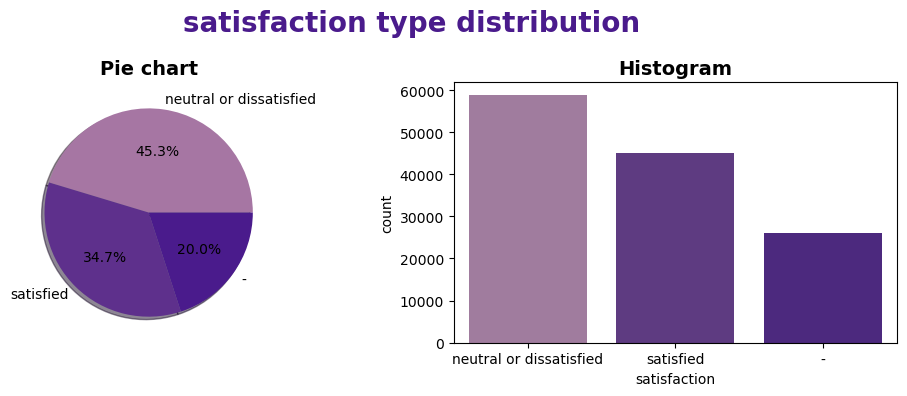

In [8]:
for category in ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']:
    vizual_cat(category)

<div style="padding: 12px; text-align: justify; border: 4px solid #4A1B8C">

<span style="color: #A676A3; font-weight:bold">Gender</span> The number of male customers is almost equal to female. Nan values should be deleted<br>
<span style="color: #A676A3; font-weight:bold">Customer type</span> Loyal customers have higher number compared to other type. Nan values should be filled with disloyal type since they are not in air company database <br>
<span style="color: #A676A3; font-weight:bold">Travel type</span> It can be seen that business flight have the highest number. Nan values should be filled with most popular category<br>
<span style="color: #A676A3; font-weight:bold">Class type</span> It can be seen that business flight have the highest number. Nan values should be filled with most popular category <br> 
<span style="color: #A676A3; font-weight:bold">Target</span> The total number of satisfied customers is slightly lower than neutral or dissatisfied. We have 20% of unknown values, it is worth considering<br> 
</div>

In [9]:
# treat nan values of category values
data.dropna(subset='gender', inplace= True)
data['customer_type'].fillna('disloyal Customer', inplace=True)
data['type_of_travel'].fillna('Business travel', inplace=True)
data['class'].fillna('Business', inplace=True)

<div style="font-family: Trebuchet MS; background-color: #A676A3; color: #FFFFFF; padding: 12px;">Сustomer ratings</div>

In [10]:
scores = ['inflight_wifi_service',
               'departure_arrival_time_convenient', 'ease_of_online_booking',
               'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
               'inflight_entertainment', 'on_board_service', 'leg_room_service',
               'baggage_handling', 'checkin_service', 'inflight_service',
               'cleanliness']
for category in scores:
    vizual_cat(category)

Clear scores - delete all rows with values > 5 and Nan

In [12]:
# replace values greater than 5 with NaN and 1 with 0
for col in scores:
    data[col] = data[col].apply(lambda x: np.NaN if x > 5 else (1 if x ==0 else x))
    

In [13]:
# delete rows with NaN
data.dropna(subset=scores, inplace=True)

******************************
.: inflight_wifi_service Type Total :.
******************************
inflight_wifi_service
2.0    31985
3.0    31791
1.0    25959
4.0    24487
5.0    14202
Name: count, dtype: int64
******************************
.: departure_arrival_time_convenient Type Total :.
******************************
departure_arrival_time_convenient
4.0    31522
5.0    27665
1.0    25823
3.0    22121
2.0    21293
Name: count, dtype: int64
******************************
.: ease_of_online_booking Type Total :.
******************************
ease_of_online_booking
3.0    30024
2.0    29736
1.0    27257
4.0    24166
5.0    17241
Name: count, dtype: int64
******************************
.: gate_location Type Total :.
******************************
gate_location
3.0    35323
4.0    30142
2.0    24004
1.0    21745
5.0    17210
Name: count, dtype: int64
******************************
.: food_and_drink Type Total :.
******************************
food_and_drink
4.0    30220
5.0    27623

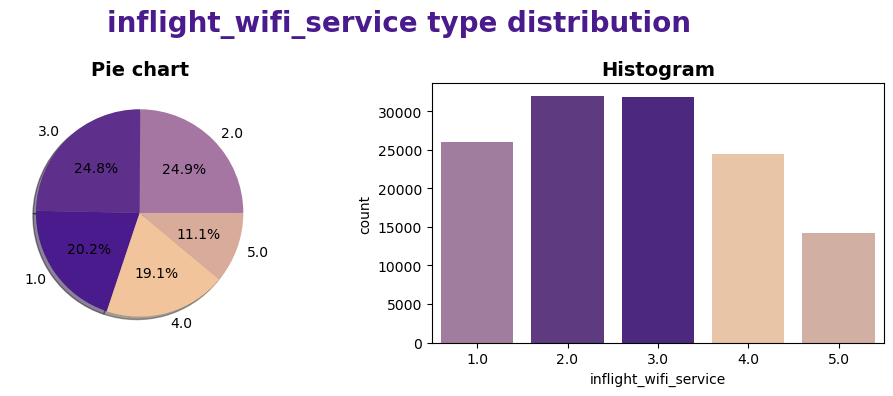

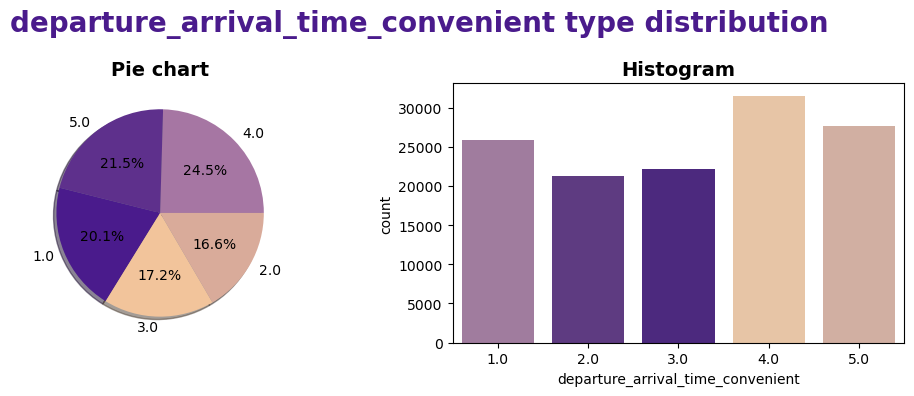

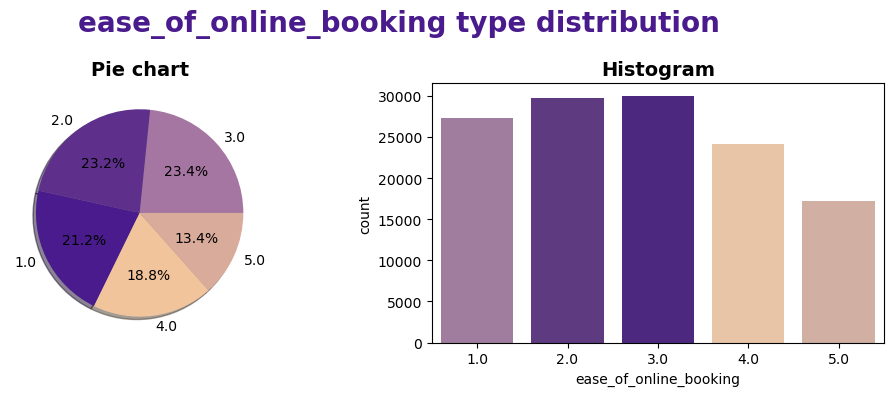

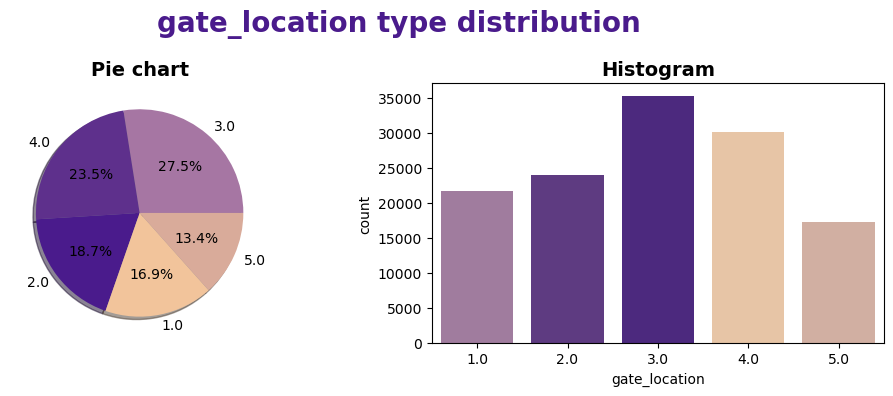

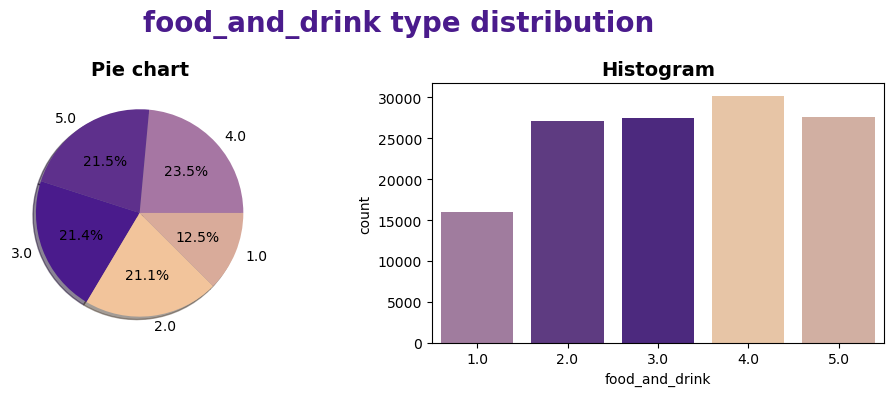

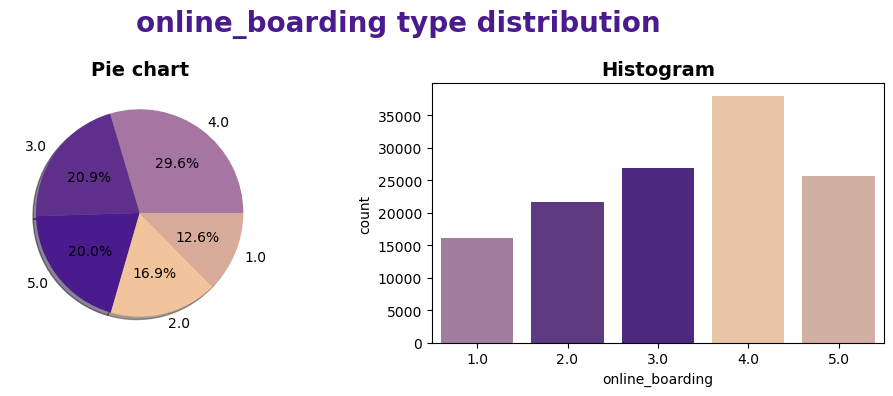

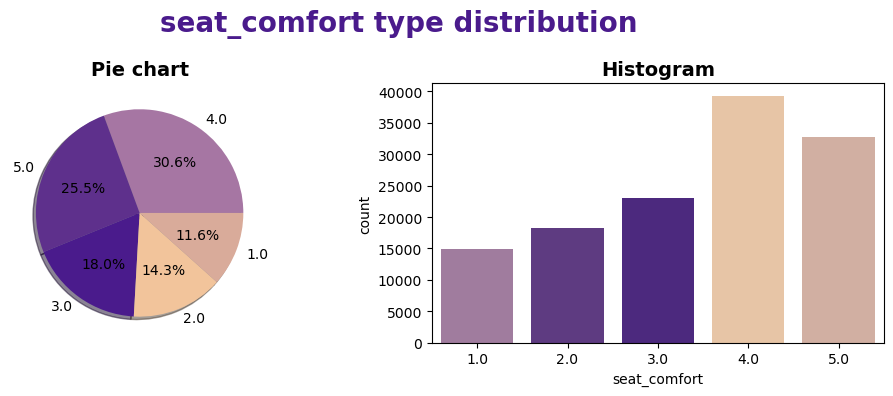

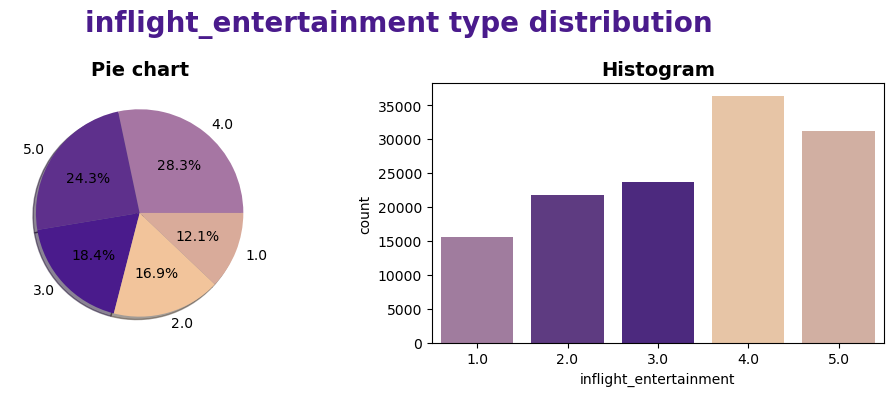

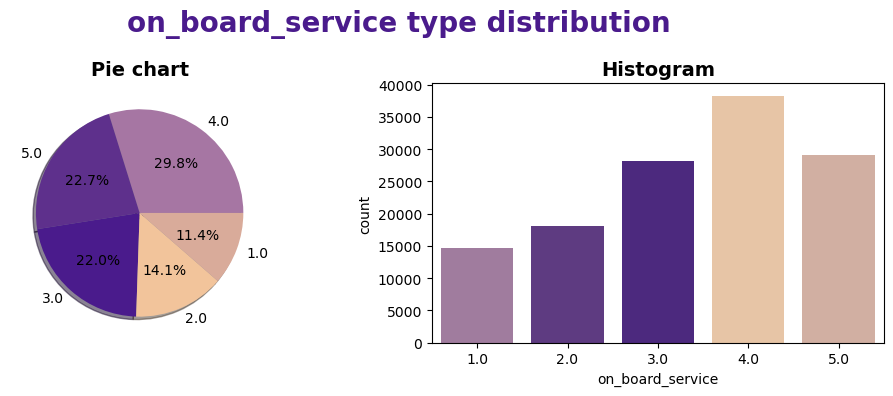

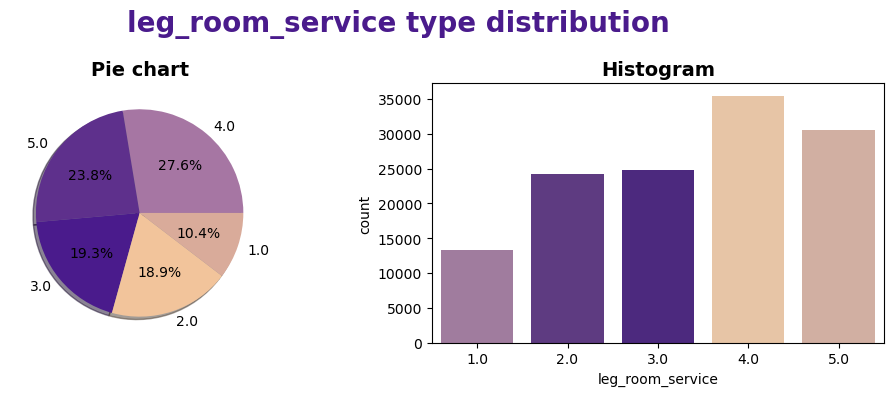

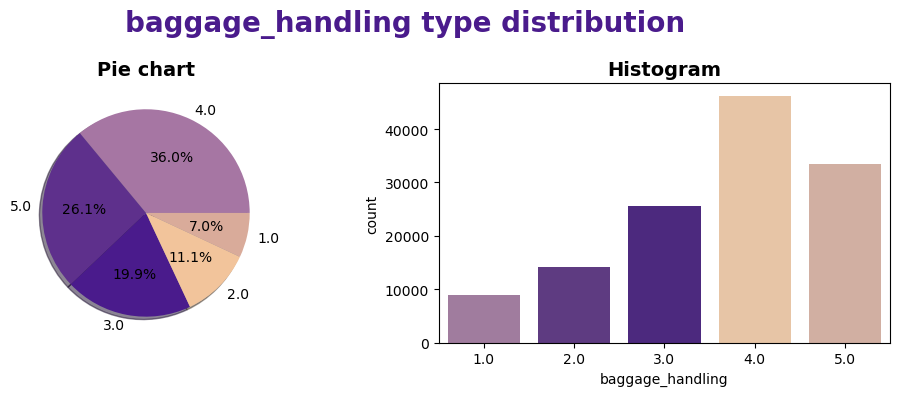

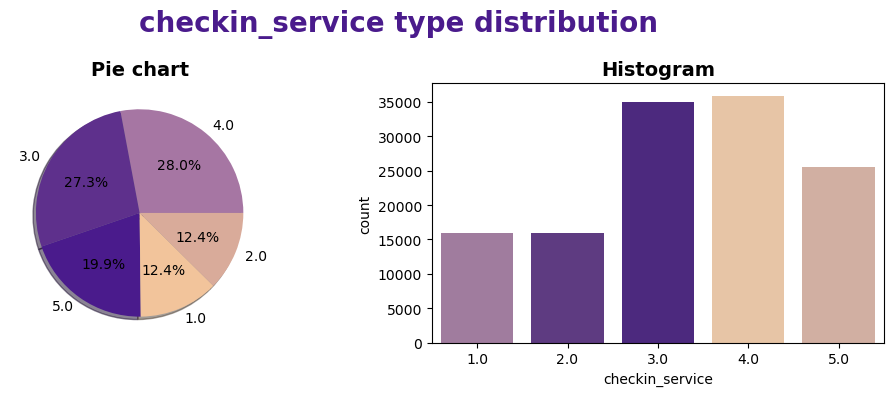

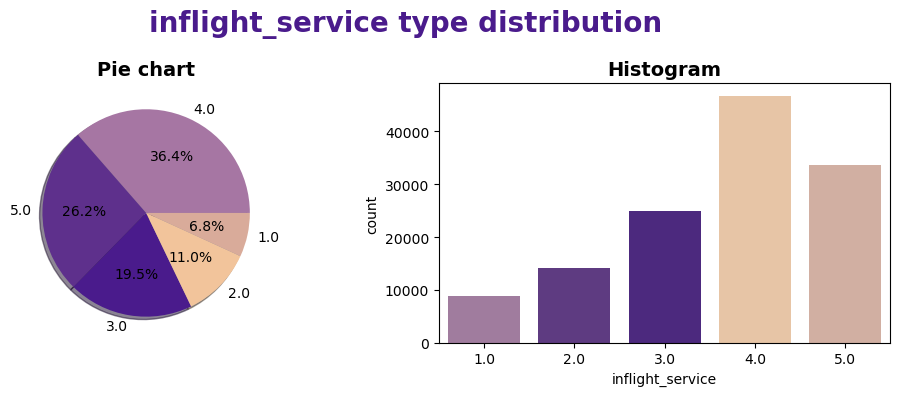

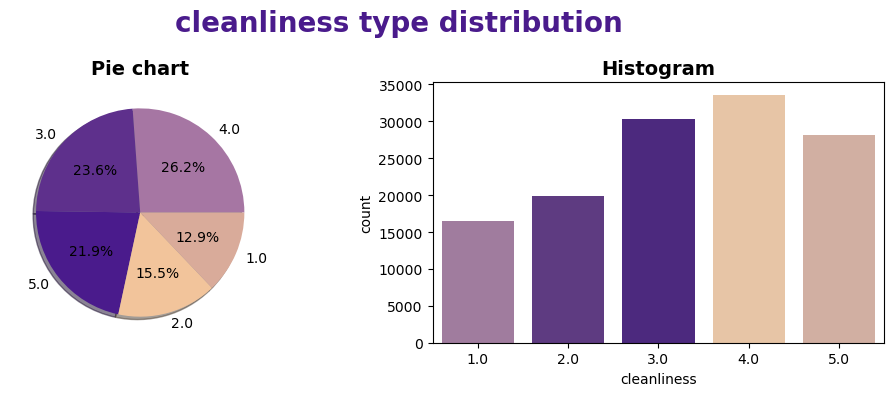

In [14]:
for category in scores:
    vizual_cat(category)

<div style="font-family: Segoe UI; line-height: 2; color: #000000;padding: 12px; text-align: justify; border: 4px solid #4A1B8C">
    - For all categories, the estimates are distributed almost equally.<br>
    - In general, there are more positive ratings than negative ones.<br>
</div>

### <div style="font-family: Trebuchet MS; background-color: #5E308C; color: #FFFFFF; padding: 10px; line-height: 1.2;">3.2 | Numeric features </div>

In [15]:
data[numeric].describe().T.style.background_gradient(cmap = CMAP1)

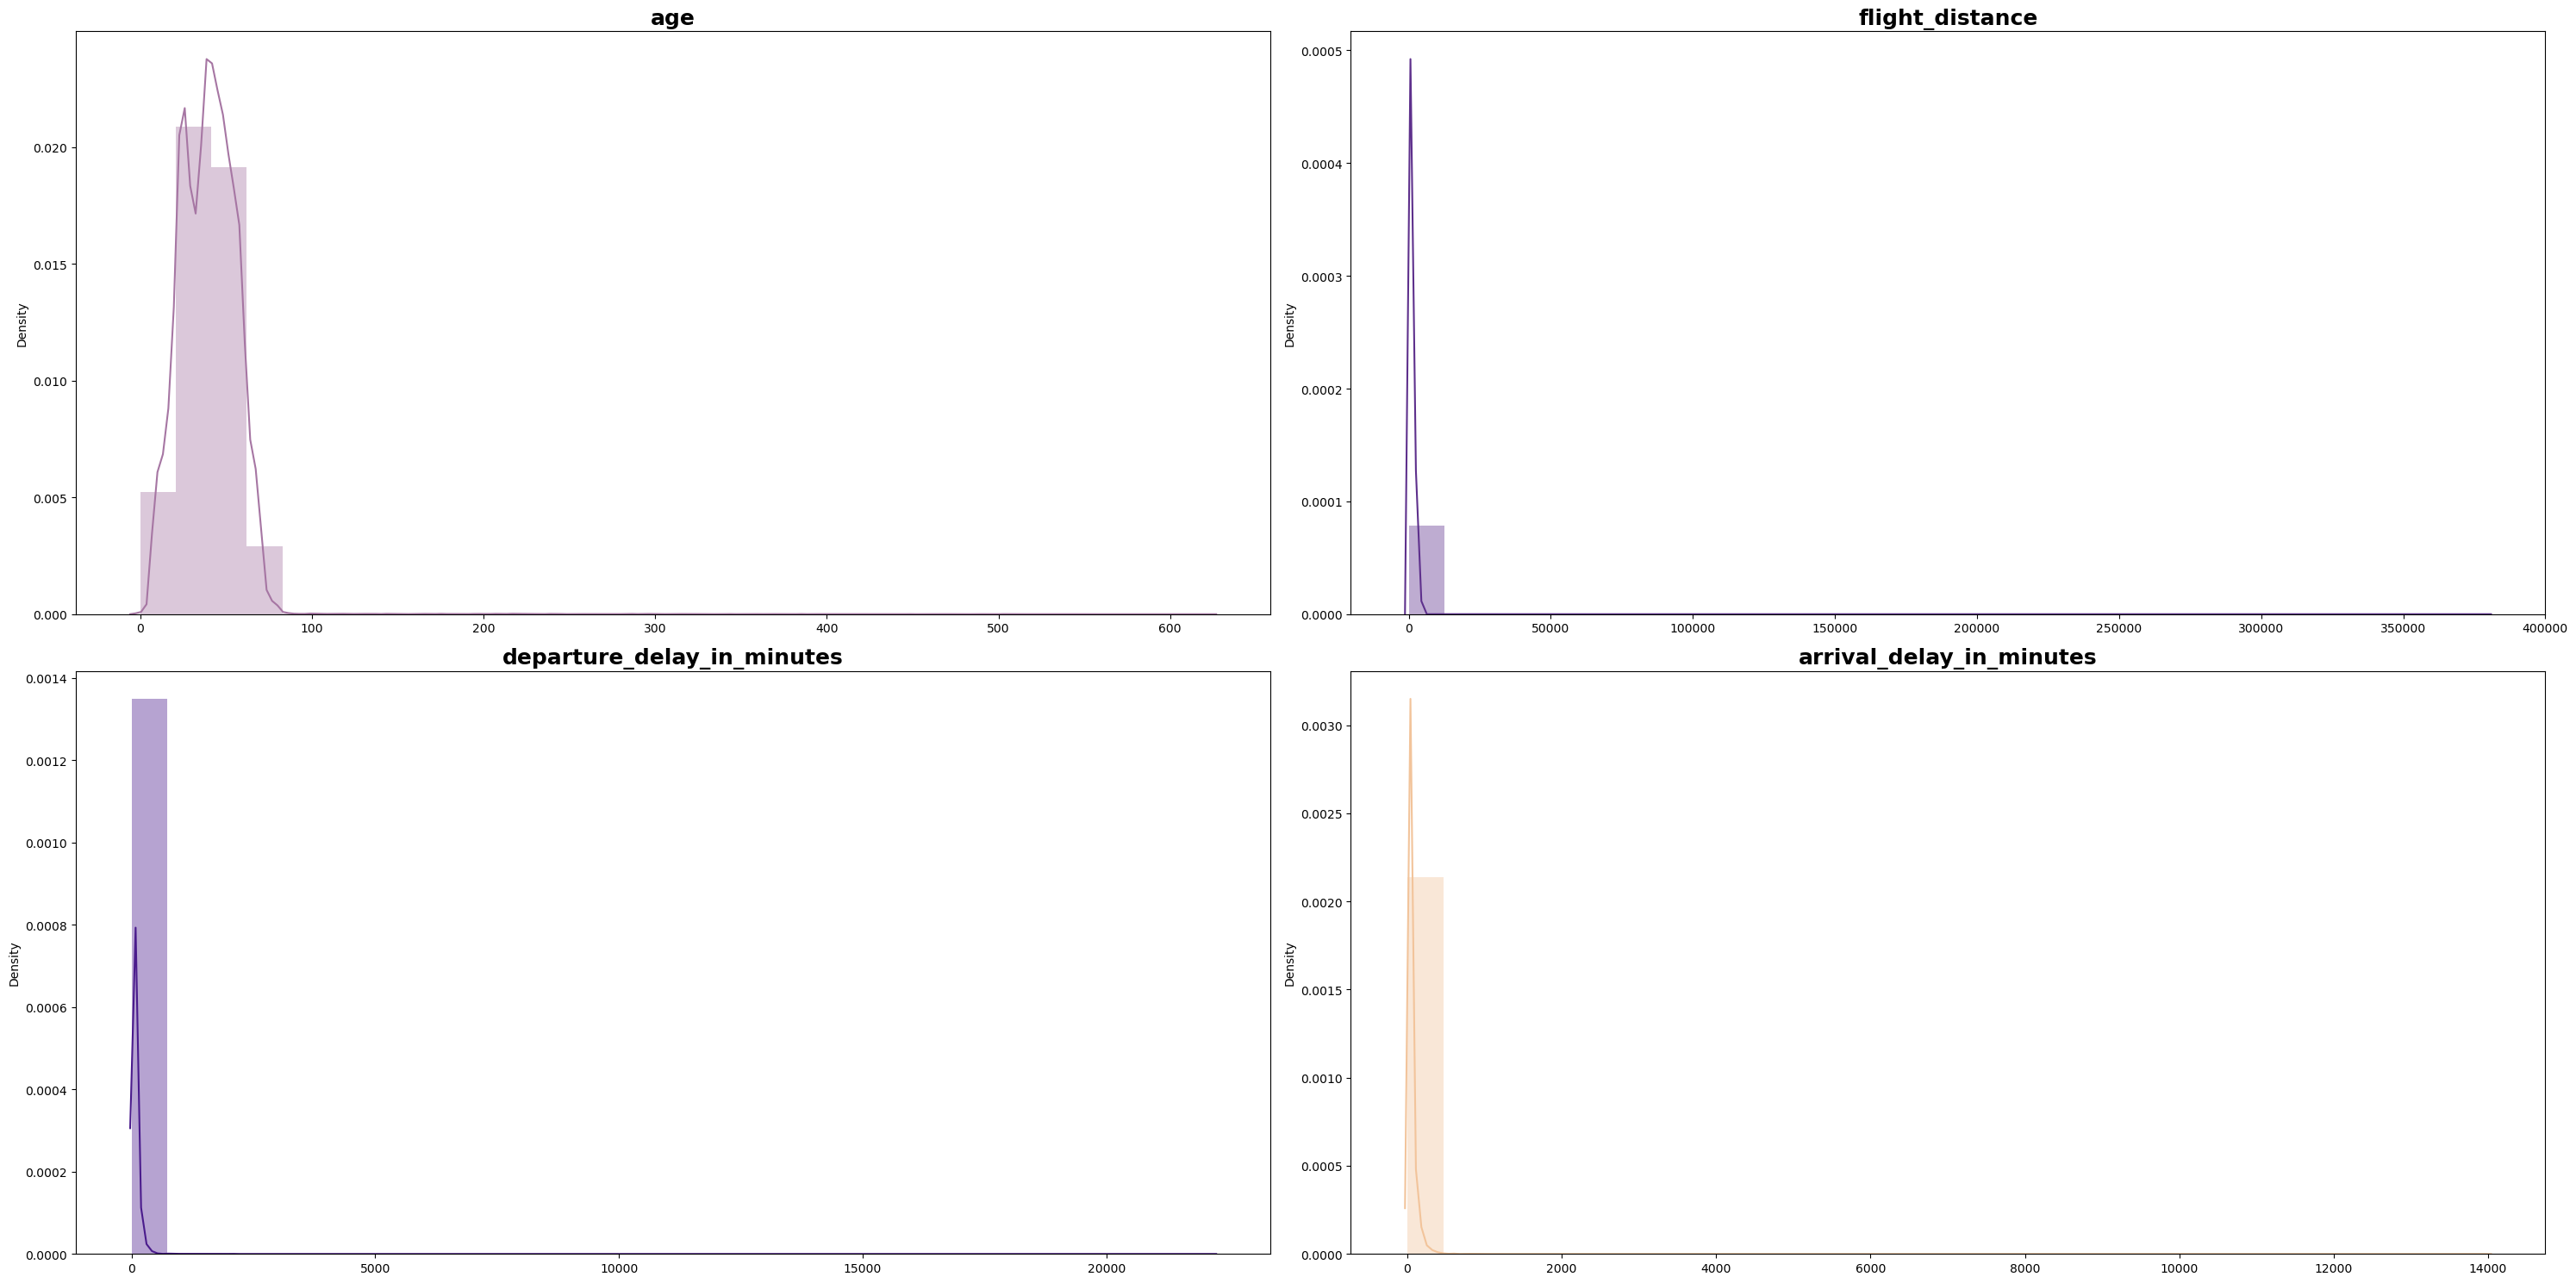

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (30,15))

for index, column in enumerate(data[numeric].columns):
    sns.distplot(ax=axes.flatten()[index], x=data[column], hist = True,
             bins = 30,
             kde = True,
             vertical = False, color = my_colors[index],label = column)
    axes.flatten()[index].set_title(f'{column}', size=18, weight='bold')

fig.tight_layout()

- There are outliers for all numerical categories
- The majority of passengers are aged 30-50 years
- Most flights are not delayed

In [142]:
def remove_outliers(col):
    '''
    Function to remove outliars via interquartile range 
    '''
    Q1, Q3 = data[col].quantile(0.1), data[col].quantile(0.9)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    data.drop(data[(data[col] < lower_range)|(data[col] > upper_range)].index, inplace=True)
    

In [19]:
for col in numeric:
    remove_outliers(col)

In [20]:
# fill NaN values with mean
for col in numeric:
    data[col].fillna(data[col].mean(), inplace=True)


<div style="padding: 12px; text-align: justify; border: 4px solid #4A1B8C">
    
<span style="color: #A676A3; font-weight:bold">Target</span> 
    
We check mean scores for every group of clients. However, these values were practically the same, so we have to drop data with unknown `satisfaction` <br> 
    <br>
    <mark>Final dataset - <b>(97941, 23)</b></mark> <br> 
</div>

In [43]:
data[data['satisfaction']=='satisfied'][scores].mean().mean().round(2)

3.63

In [42]:
data[data['satisfaction']=='neutral or dissatisfied'][scores].mean().mean().round(2)

2.96

In [44]:
data[data['satisfaction']=='-'][scores].mean().mean().round(2)

3.26

In [45]:
data = data[data['satisfaction'] !='-']

In [47]:
data.shape

(97941, 23)

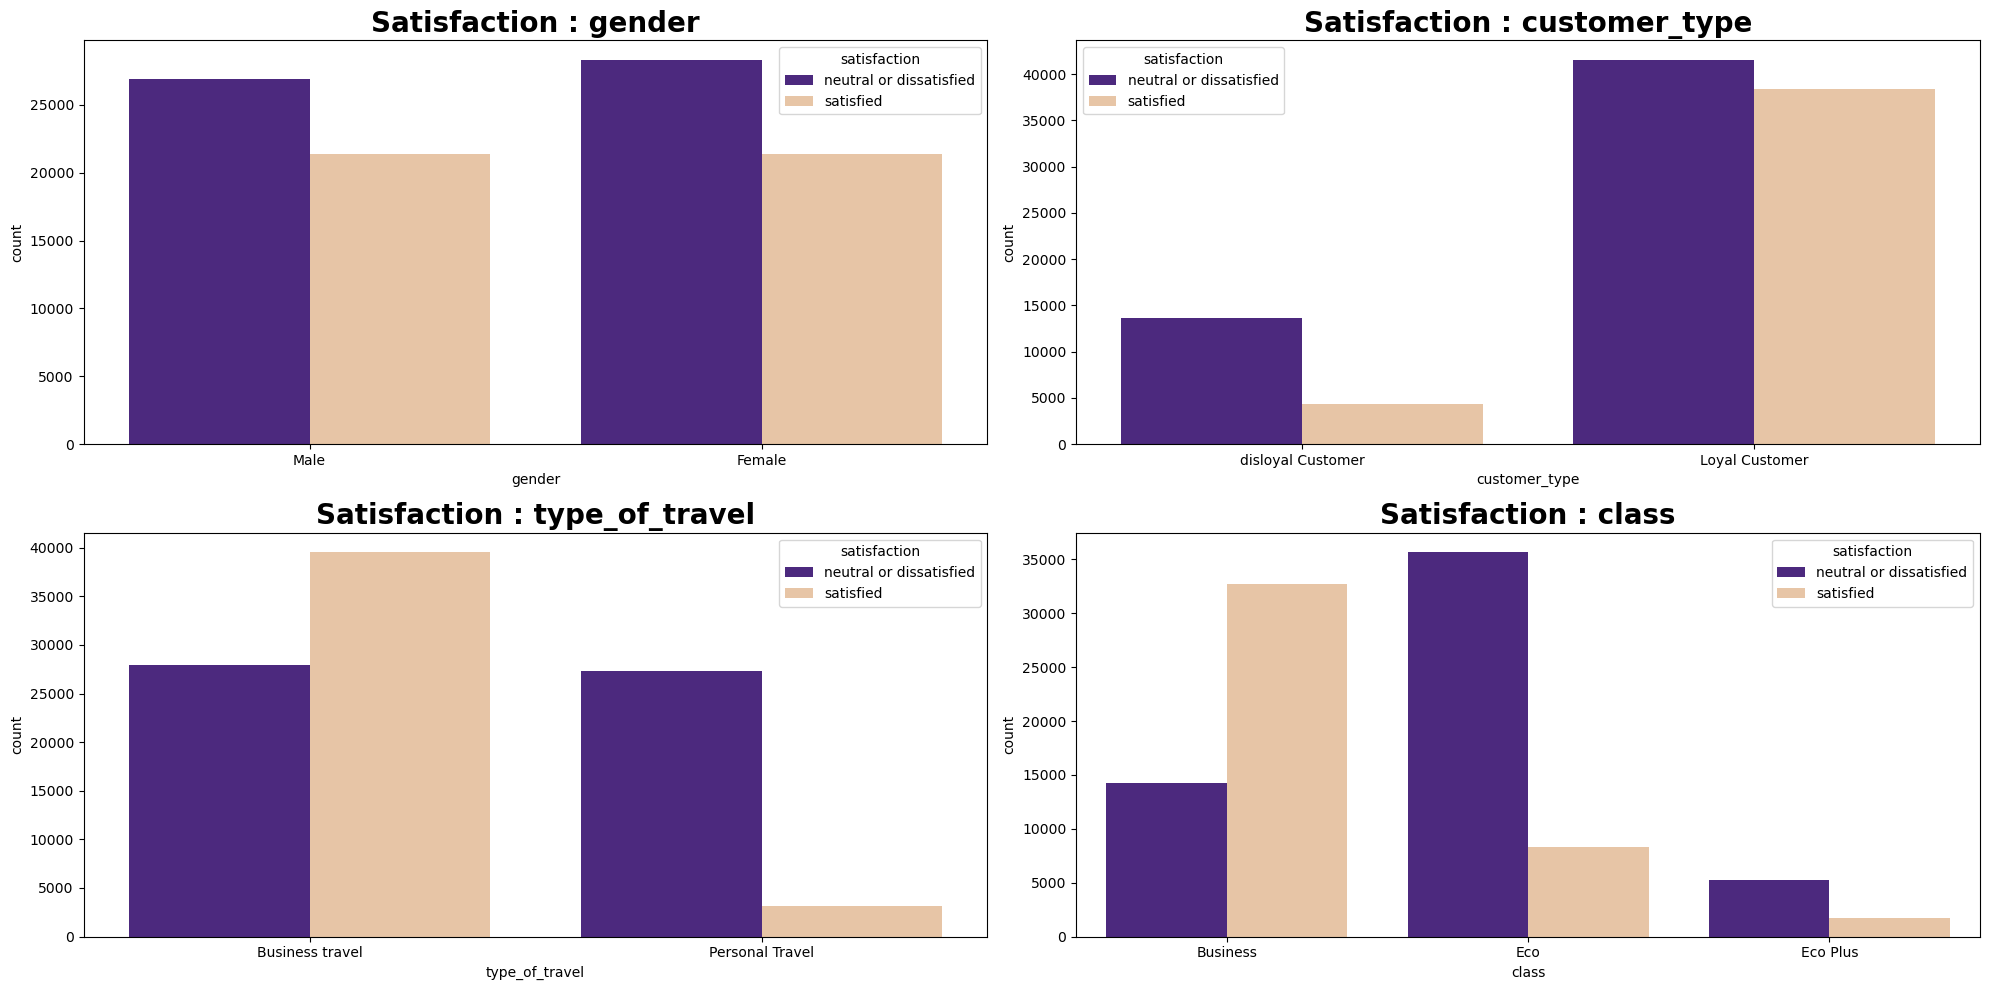

In [69]:
fig, axes = plt.subplots(2, 2, figsize = (20,10))

for index, column in enumerate(data[['gender', 'customer_type', 'type_of_travel', 'class']].columns):
    sns.countplot(x=data[column],hue=data['satisfaction'],data=data, ax=axes.flatten()[index], palette=my_colors[2:])
    axes.flatten()[index].set_title(f'Satisfaction : {column}', size=20, weight='bold')

fig.tight_layout()

### <div style="font-family: Trebuchet MS; background-color: #5E308C; color: #FFFFFF; padding: 10px; line-height: 1.2;">3.3 | Heatmap </div>


interval columns not set, guessing: ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']


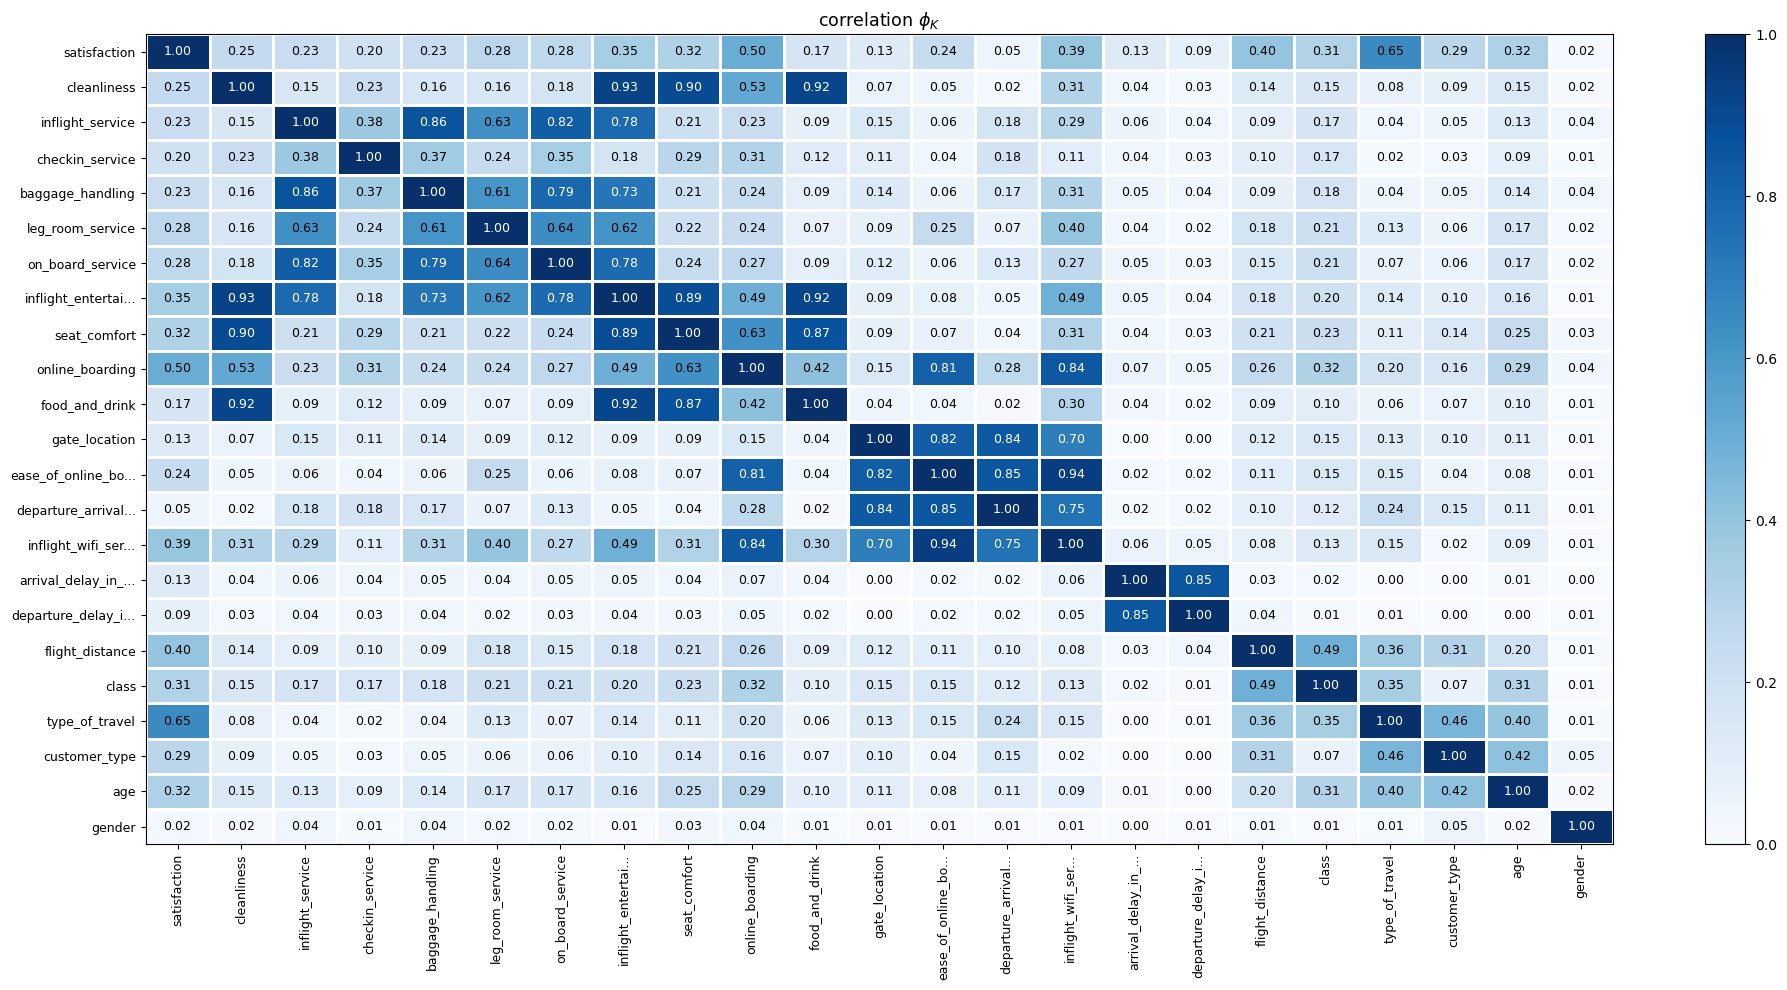

In [86]:
# Phik correlation matrix
phik_overview = data.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Blues",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.9,
                        figsize=(20, 10))
plt.tight_layout()

## <div style="font-family: Trebuchet MS; background-color: #4A1B8C; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Data Pre-processing </div>

In [220]:
X = data.drop(['satisfaction'], axis=1)
y = data['satisfaction']


In [120]:
y = y.map(lambda x: 1 if x == 'satisfied' else 0)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
col_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric),
        ('ohe', OneHotEncoder(sparse=False, drop='first'), categorical[:-1])],
    remainder="passthrough"
)

In [124]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)



In [125]:
print(clr.S + 'Training sample size: ' + clr.E + f'{X_train.shape}')
print(clr.S + 'Testing sample size: ' + clr.E + f'{X_test.shape}')


Training sample size: (78352, 65)
Testing sample size: (19589, 65)


In [146]:
X = col_transformer.fit_transform(X)

In [148]:
X.shape

(97941, 65)

## <div style="font-family: Trebuchet MS; background-color: #4A1B8C; color: #FFFFFF; padding: 12px; line-height: 1.5;">5. | Train classifiers </div>


**<span style="color:#5E308C;font-size:120%">Take as models:</span>**<br>

- LogisticRegression
- RandomForestClassifier
- CatBoostClassifier

Carry out cross-validation of models

**<span style="color:#5E308C;font-size:120%">Select hyperparameters with Optuna</span>**<br>

**<span style="color:#5E308C;font-size:120%">Test the resulting model by metrics:</span>**<br>
- Precision
- Recall
- F1 score

### <div style="font-family: Trebuchet MS; background-color: #5E308C; color: #FFFFFF; padding: 10px; line-height: 1.2;">5.1 | Choose model </div>

In [126]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [127]:
lr = LogisticRegression(solver='liblinear', n_jobs=-1)
rf = RandomForestClassifier()
catb = CatBoostClassifier(verbose = None, logging_level = 'Silent')
scores_dict = {}
models = {
    'linear': lr,
    'catboost': catb,
    'rf': rf,
}


In [128]:
print(">>>> Training started <<<<")
for key in models:
    model = models[key]
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    scores_dict[key] = scores.mean()
    print(clr.S +f"{key} - Accuracy:" +clr.E+  " %0.4f" %(scores.mean()))
    model.fit(X_train, y_train)
    # Save model for prediction
    models[key] = model

>>>> Training started <<<<
linear - Accuracy: 0.9177
catboost - Accuracy: 0.9495
rf - Accuracy: 0.9453


In [129]:
# Catboost
def objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
        'verbose': None, 
        'logging_level': 'Silent'
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    clf = CatBoostClassifier(**param)
    
    return cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy', error_score='raise').mean()


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

cl_cb = CatBoostClassifier(**study.best_params)
cl_cb.fit(x_train, y_train)
classifiers_optuna.append(cl_cb)

print('Accuracy score:'+ clr.S+'{:.3f}'.format(study.best_value)+clr.E)
print("Best hyperparameters:"+clr.S+"{}".format(study.best_params)+clr.E)

[I 2023-08-09 15:05:41,825] A new study created in memory with name: no-name-8795b7d5-2e21-4865-90ec-64ad5443b21b
[I 2023-08-09 15:06:03,382] Trial 0 finished with value: 0.9115784854468216 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.059762454835698725, 'depth': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.911717961218959}. Best is trial 0 with value: 0.9115784854468216.
[I 2023-08-09 15:07:30,214] Trial 1 finished with value: 0.9426051461739778 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09159165445105788, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.809477630611161}. Best is trial 1 with value: 0.9426051461739778.
[I 2023-08-09 15:08:51,801] Trial 2 finished with value: 0.9345900110915837 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.05903988734445532, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature':

NameError: name 'x_train' is not defined

In [130]:
cl_cb.fit(X_train, y_train)

0:	learn: 0.6494792	total: 137ms	remaining: 2m 16s
1:	learn: 0.6109179	total: 274ms	remaining: 2m 16s
2:	learn: 0.5817588	total: 391ms	remaining: 2m 9s
3:	learn: 0.5588499	total: 458ms	remaining: 1m 54s
4:	learn: 0.5239561	total: 536ms	remaining: 1m 46s
5:	learn: 0.4932228	total: 635ms	remaining: 1m 45s
6:	learn: 0.4722542	total: 774ms	remaining: 1m 49s
7:	learn: 0.4546471	total: 885ms	remaining: 1m 49s
8:	learn: 0.4394932	total: 998ms	remaining: 1m 49s
9:	learn: 0.4205023	total: 1.11s	remaining: 1m 49s
10:	learn: 0.3970444	total: 1.21s	remaining: 1m 49s
11:	learn: 0.3773044	total: 1.33s	remaining: 1m 49s
12:	learn: 0.3606093	total: 1.42s	remaining: 1m 47s
13:	learn: 0.3521736	total: 1.46s	remaining: 1m 43s
14:	learn: 0.3407021	total: 1.51s	remaining: 1m 39s
15:	learn: 0.3296361	total: 1.61s	remaining: 1m 39s
16:	learn: 0.3207918	total: 1.65s	remaining: 1m 35s
17:	learn: 0.3140226	total: 1.75s	remaining: 1m 35s
18:	learn: 0.3024255	total: 1.89s	remaining: 1m 37s
19:	learn: 0.2945570	to

In [131]:
print('Accuracy score:'+ clr.S+'{:.3f}'.format(study.best_value)+clr.E)
print("Best hyperparameters:"+clr.S+"{}".format(study.best_params)+clr.E)

Accuracy score:0.951
Best hyperparameters:{'objective': 'CrossEntropy', 'colsample_bylevel': 0.09959030328834526, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}


In [132]:
import pickle
path = '/Users/user/Yandex.Disk.localized/DS_projects/streamlite_project'
def save_to_pkl(data, file_name):
    with open(f'{path}/{file_name}.pkl', 'wb') as f:
        pickle.dump(data, f)
    print(f'Saved to {path}/{file_name}.pkl')

def load_from_pkl(file_name):
    loaded_data = pickle.load(open(f'{path}/{file_name}.pkl', 'rb'))
    return loaded_data

In [136]:
save_to_pkl(cl_cb, 'model')

Saved to /Users/user/Yandex.Disk.localized/DS_projects/streamlite_project/model.pkl


### <div style="font-family: Trebuchet MS; background-color: #5E308C; color: #FFFFFF; padding: 10px; line-height: 1.2;">5.2| Feature importance </div>

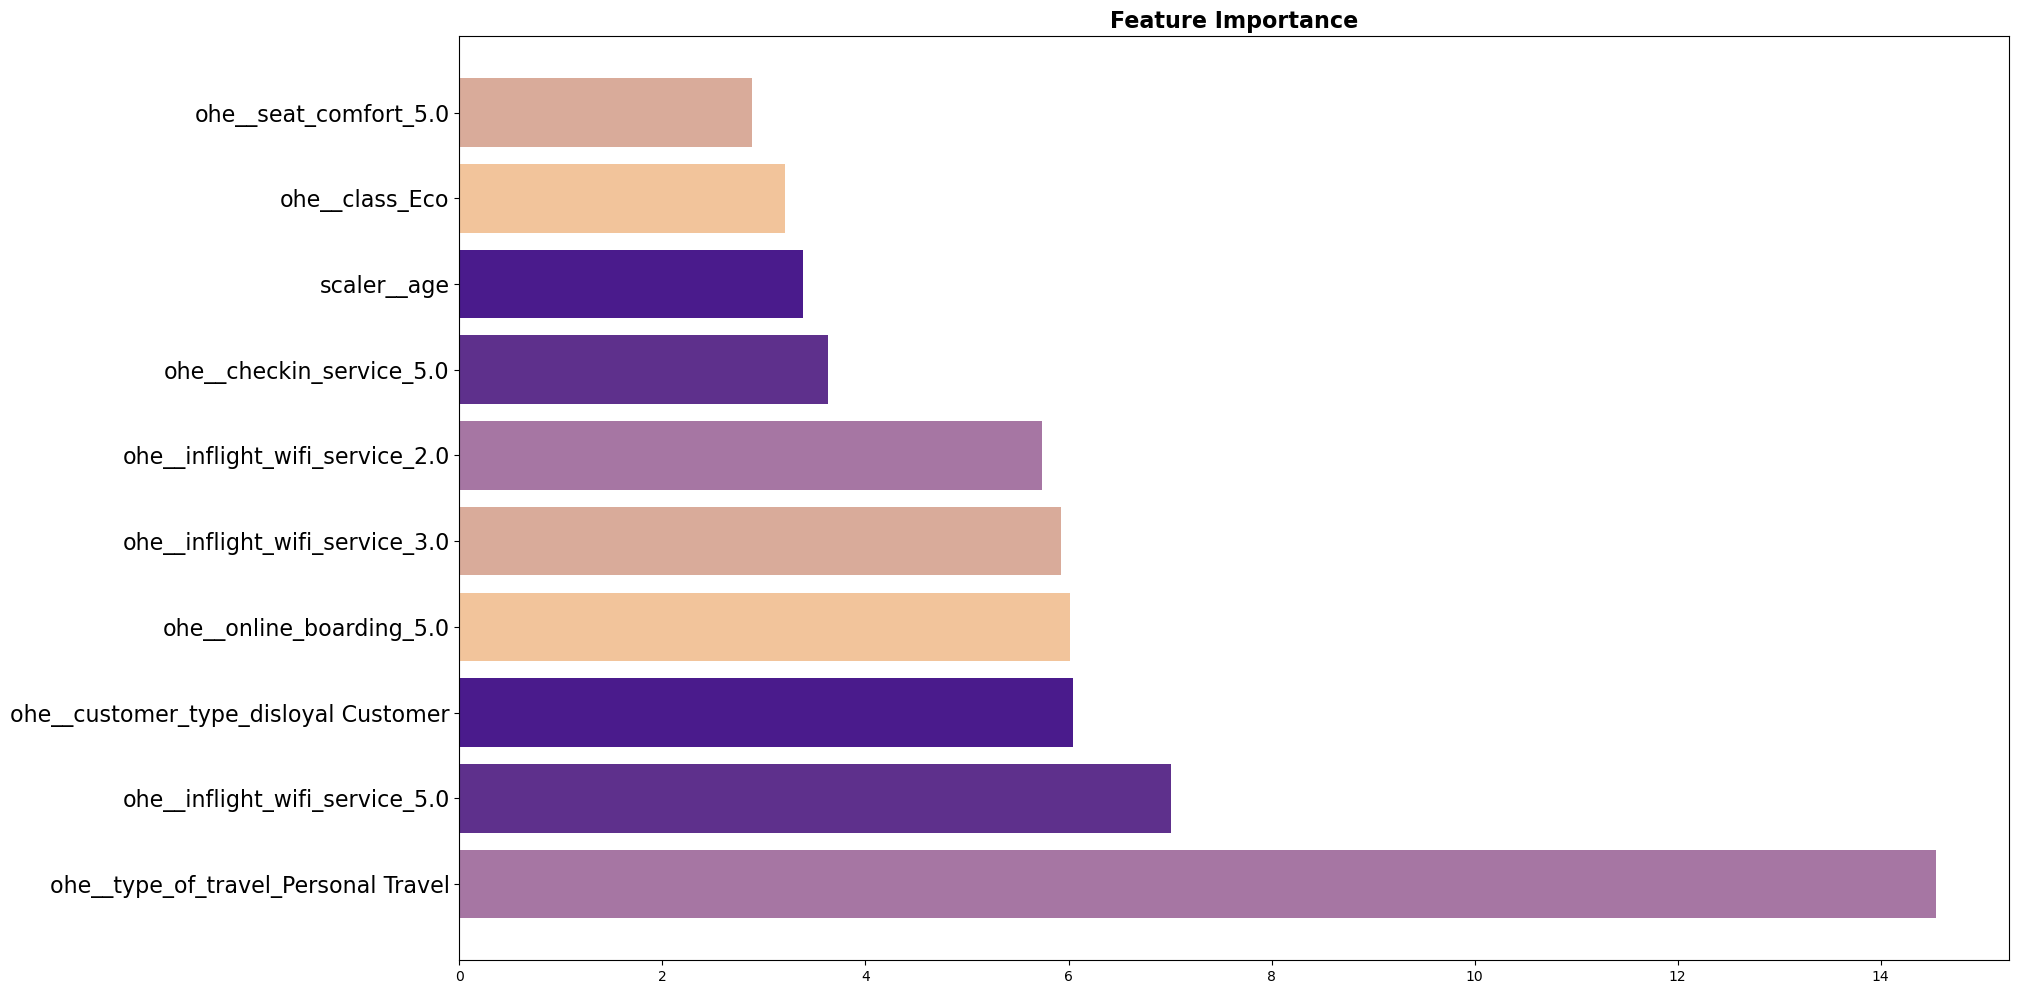

In [137]:
feature_importance = cl_cb.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:10]
a = col_transformer.get_feature_names_out()

fig = plt.figure(figsize=(20, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color=my_colors)
plt.yticks(range(len(sorted_idx)), np.array(a)[sorted_idx], size=16)
plt.title('Feature Importance', size=16, weight='bold')
plt.show()

<div style="padding: 12px; text-align: justify; border: 4px solid #4A1B8C">

<span style="color: #A676A3; font-weight:bold">Most important features are</span> 

- type of travel 
- wi-fi service
- customer type
</div>

### <div style="font-family: Trebuchet MS; background-color: #5E308C; color: #FFFFFF; padding: 10px; line-height: 1.2;">5.3 | Test model </div>

In [143]:
pred = cl_cb.predict(X_test)
print(clr.S +f"F1 Score" +clr.E+  " %0.4f" %(f1_score(y_test, pred)))
print(clr.S +f"Precision" +clr.E+  " %0.4f" %(precision_score(y_test, pred)))
print(clr.S +f"Recall" +clr.E+  " %0.4f" %(recall_score(y_test, pred)))


F1 Score 0.9432
Precision 0.9719
Recall 0.9162


In [139]:
catboost_matrix = confusion_matrix(y_test, pred)

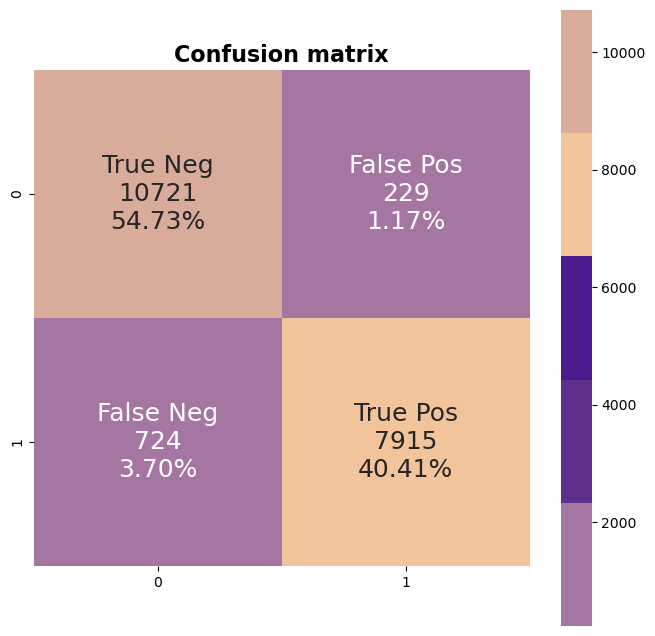

In [141]:
fig = plt.figure(figsize=(8, 8))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in catboost_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in catboost_matrix.flatten()/np.sum(catboost_matrix)]
labels = [f'{v1}\n{v2}\n{v3}'for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(catboost_matrix, annot=labels, fmt='', cmap=my_colors,  annot_kws={"size":18}, square=True)
plt.title('Confusion matrix', size=16, weight="bold" )
plt.show()

The model is good at recognizing dissatisfied clients. There are almost no FalsePositive answers. 